In [ ]:
#create hdf file which is C++ dataframe

In [11]:
#transverse momentum

#pT = pd.DataFrame(data= np.sqrt(ev_part.px**2 + ev_part.py**2),columns=['pT'])
#pT

#pT.sort_values(by='pT',ascending=False)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import psycopg2

import train_1
from mpl_toolkits import mplot3d
from scipy import stats

**Reading in files + pulling important colns**

In [22]:
###read in truth, just take pid & hid
truth = pd.read_csv('/Users/pfudolig/patatrack/trackml-library-master/trackml/train_1/event000001884-truth.csv')
df_truth = pd.DataFrame(data=truth.loc[:,["particle_id","hit_id"]])

###sorting hits per pid
grouped_df = df_truth.groupby("particle_id")
grouped_lists = grouped_df["hit_id"].apply(list)
grouped_lists = grouped_lists.reset_index()
#print(grouped_lists)

###making sorted hits into dataframe
sorted = pd.DataFrame(data=grouped_lists)
sorted.head(7)
#attach the column hit_id to other transverse

###make csv file
#csv = pd.DataFrame(data=grouped_lists)
#csv
#csv.to_csv('grouped_hits.csv')

,particle_id,hit_id
0,0,"[4, 5, 28, 31, 41, 48, 63, 69, 96, 101, 111, 1..."
1,4503668346847232,"[4564, 6848, 6918, 9610, 9702, 15766, 26279, 6..."
2,4504218102661120,"[21042, 28667, 35651, 42083, 74575, 74590, 813..."
3,4504286822137856,"[20992, 21131]"
4,4504286838919169,"[76294, 83944, 90534]"
5,4504355541614592,"[20995, 28651, 35649, 42079, 42084, 74582, 749..."
6,4504492980568064,"[19374, 27988, 35214, 41375, 71303, 73934, 810..."


In [3]:
###read in particles
ev_particles = pd.read_csv('/Users/pfudolig/patatrack/trackml-library-master/trackml/train_1/event000001884-particles.csv')
df_part = pd.DataFrame(data=ev_particles)
#ev_particles

###just what we want
pdf_new = df_part[['particle_id','q','nhits']].copy()
pdf_new.head(3)

,particle_id,q,nhits
0,4503668346847232,1,11
1,4504218102661120,-1,13
2,4504286822137856,1,2


In [4]:
###read in hits
hitsin3d = pd.read_csv('/Users/pfudolig/patatrack/trackml-library-master/trackml/train_1/event000001884-hits.csv')
df_hits = pd.DataFrame(data=hitsin3d)
hitsin3d.head(3)

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-57.3834,0.123128,-1502.5,7,2,1
1,2,-56.8778,-4.150380,-1502.5,7,2,1
2,3,-53.4807,-3.582090,-1502.5,7,2,1


**Task 1: Create a single dataframe containing all particles + hits positions**

In [5]:
#combine for all colns we want, a little convoluted

#df_truth
#pdf_new

### all columns wanted, not sorted
ptcombo = df_truth.join(pdf_new.set_index('particle_id'), on='particle_id')
#ptcombo

### all columns wanted, sorted
allcombo = df_hits.join(ptcombo.set_index('hit_id'), on='hit_id')
#allcombo

### group by hits per pid
grouped_df = allcombo.groupby("particle_id")
grouped_lists = grouped_df["hit_id"].apply(list)
grouped_lists = grouped_lists.reset_index()
single = pd.DataFrame(data=grouped_lists)

### 
rest = allcombo[['x','y','z','volume_id','layer_id','module_id','particle_id','q','nhits']].copy()
both = single.join(rest.set_index('particle_id'), on='particle_id')
#both.head(3)

### just pids, hids, & positions
### really all we wanted, idk why i took all those extra steps
single = pd.DataFrame(data=both.loc[:,["particle_id","hit_id","x","y","z"]])
single.head(3)

#how to make positions an array?

,particle_id,hit_id,x,y,z
0,0,"[4, 5, 28, 31, 41, 48, 63, 69, 96, 101, 111, 1...",-62.5778,-4.50877,-1502.5
0,0,"[4, 5, 28, 31, 41, 48, 63, 69, 96, 101, 111, 1...",-99.3106,-5.96724,-1502.5
0,0,"[4, 5, 28, 31, 41, 48, 63, 69, 96, 101, 111, 1...",-171.6000,-12.40950,-1502.0


**Task 2: Create a visualization function that takes particleId and visualizes only the hits belonging to that particle**

type the particle id: 4503668346847232


Text(0.5, 0.92, 'particle: 4503668346847232')

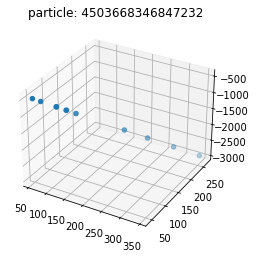

In [7]:
#ask for pid and take it in
pid = input('type the particle id: ')
pidint = int(pid)

#take
row = sorted.index[sorted['particle_id'] == pidint].tolist()
row = row[0]

#empty arrays to fill
xdata = []
ydata = []
zdata = []
hitslist = sorted['hit_id'][row]
for i in range(len(hitslist)): #loop for number of elements in the list for the hit_id for that row aka particle id 
    xdata.append(df_hits['x'][hitslist[i]-1])
    ydata.append(df_hits['y'][hitslist[i]-1])
    zdata.append(df_hits['z'][hitslist[i]-1])
    
#plot
ax = plt.axes(projection='3d')
ax.scatter3D(xdata,ydata,zdata)
plt.title("particle: " + pid)

In [26]:
#display first 5 (or any 5?) particles and their hits

sorted2 = pd.DataFrame(data=grouped_lists.loc[1:5,["particle_id","hit_id"]])
#sorted2

#ask for pid and take it in
#pid = input('type 5 particle ids: ')
#pidint = int(pid)

#take
row = sorted2.index
row = sorted2.index[sorted2['particle_id']].tolist()
row = row[0:4]

#empty arrays to fill
xdata = []
ydata = []
zdata = []
hitslist = sorted2['hit_id'][row]
for i in range(len(hitslist)): #loop for number of elements in the list for the hit_id for that row aka particle id 
    xdata.append(df_hits['x'][hitslist[i]-1])
    ydata.append(df_hits['y'][hitslist[i]-1])
    zdata.append(df_hits['z'][hitslist[i]-1])
    
#plot
ax = plt.axes(projection='3d')
ax.scatter3D(xdata,ydata,zdata)
plt.title("particle: " + pid)

IndexError: index 4503668346847232 is out of bounds for axis 0 with size 5

**Task 3: From the hits dataframe, group hits by volume and layer id create a visualization function that displays only hits on the same detector layer**

In [9]:
#sorting hits per vol_id

grouped_volhits = df_hits.groupby("volume_id")
vollist = grouped_volhits["hit_id"].apply(list)
vollist = vollist.reset_index()
#print(vollist)

df_volid = pd.DataFrame(data=vollist)
df_volid

,volume_id,hit_id
0,7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,8,"[16988, 16989, 16990, 16991, 16992, 16993, 169..."
2,9,"[46986, 46987, 46988, 46989, 46990, 46991, 469..."
3,12,"[64869, 64870, 64871, 64872, 64873, 64874, 648..."
4,13,"[72807, 72808, 72809, 72810, 72811, 72812, 728..."
5,14,"[99150, 99151, 99152, 99153, 99154, 99155, 991..."
6,16,"[107267, 107268, 107269, 107270, 107271, 10727..."
7,17,"[110194, 110195, 110196, 110197, 110198, 11019..."
8,18,"[120521, 120522, 120523, 120524, 120525, 12052..."


type the volume id: 18


Text(0.5, 0.92, 'volume id: 18')

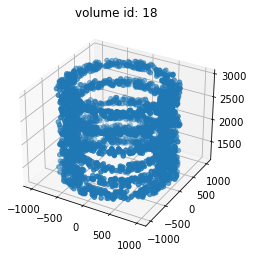

In [21]:
#ask for volume id and take it in
volid = input('type the volume id: ')
volidint = int(volid)

#take
row = df_volid.index[df_volid['volume_id'] == volidint].tolist()
row = row[0]

#empty arrays to fill
xdata = []
ydata = []
zdata = []
vidslist = df_volid['hit_id'][row]
for i in range(len(vidslist)):
    xdata.append(df_hits['x'][vidslist[i]-1])
    ydata.append(df_hits['y'][vidslist[i]-1])
    zdata.append(df_hits['z'][vidslist[i]-1])
    
#plot
ax = plt.axes(projection='3d')
ax.scatter3D(xdata,ydata,zdata)
plt.title("volume id: " + volid)

In [11]:
#sorting hits per layer_id

grouped_layhits = df_hits.groupby("layer_id")
laylist = grouped_layhits["hit_id"].apply(list)
laylist = laylist.reset_index()
#print(laylist)

df_layerid = pd.DataFrame(data=laylist)
df_layerid

,layer_id,hit_id
0,2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,4,"[1465, 1466, 1467, 1468, 1469, 1470, 1471, 147..."
2,6,"[3232, 3233, 3234, 3235, 3236, 3237, 3238, 323..."
3,8,"[5371, 5372, 5373, 5374, 5375, 5376, 5377, 537..."
4,10,"[7885, 7886, 7887, 7888, 7889, 7890, 7891, 789..."
5,12,"[10810, 10811, 10812, 10813, 10814, 10815, 108..."
6,14,"[13877, 13878, 13879, 13880, 13881, 13882, 138..."


type the layer id: 6


Text(0.5, 0.92, 'particle: 6')

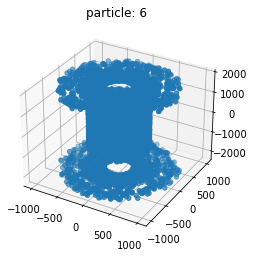

In [16]:
#ask for layer id and take it in
lid = input('type the layer id: ')
lidint = int(lid)

#take
row = df_layerid.index[df_layerid['layer_id'] == lidint].tolist()
row = row[0]

#empty arrays to fill
xdata = []
ydata = []
zdata = []
lidslist = df_layerid['hit_id'][row]
for i in range(len(lidslist)):
    xdata.append(df_hits['x'][lidslist[i]-1])
    ydata.append(df_hits['y'][lidslist[i]-1])
    zdata.append(df_hits['z'][lidslist[i]-1])
    
#plot
ax = plt.axes(projection='3d')
ax.scatter3D(xdata,ydata,zdata)
plt.title("layer: " + lid)



**Task 4: Create a numbering scheme that takes you from (volumeId, layerId) -> index. See “table” below**

In [110]:
indexscheme = df_hits[['volume_id','layer_id']].copy()
#indexscheme = indexscheme.set_index('hit_id')
indexscheme.sort_values(by='volume_id',ascending=False)
indexscheme

#does it matter if index coln is first or last?

,volume_id,layer_id
0,7,2
1,7,2
2,7,2
3,7,2
4,7,2
...,...,...
123717,18,12
123718,18,12
123719,18,12
123720,18,12


**Task 1 brainstorming**

In [6]:
#df_two = pd.DataFrame(data=df_hits.loc[:,["hit_id","x","y",'z']])
#two = df_truth.join(df_two.set_index('hit_id'), on='hit_id')
#two

#def three(hid):
#    hid = hid-1
#    xarr = two.iloc[hid,x]
#    yarr = two.iloc[hid,y]
#    zarr = two.iloc[hid,z]

#def xyz(hid):
#    hid = hid-1
#    x = df_hits.iloc[hid,1]
#    y = df_hits.iloc[hid,2]
    #z = df_hits[:,3]

#for 
    
#xyz(1)
   

,particle_id,hit_id,x,y,z
0,653025450662035456,1,-57.3834,0.123128,-1502.5
1,225193587824918528,2,-56.8778,-4.150380,-1502.5
2,666560644958388224,3,-53.4807,-3.582090,-1502.5
3,0,4,-62.5778,-4.508770,-1502.5
4,0,5,-99.3106,-5.967240,-1502.5
...,...,...,...,...,...
123717,540432436320796672,123718,-859.0710,30.090400,2944.5
123718,283733236155154432,123719,-916.3380,106.227000,2952.5
123719,441355099944517632,123720,-943.6600,3.219250,2952.5
123720,0,123721,-936.9990,109.090000,2952.5


**Task 2 brainstorming**

In [ ]:
#position & visualization functions

#justpos.iloc[0,1]

#def pos(hid):
#    hid = hid - 1
#    x = justpos.iloc[hid,0]
#    y = justpos.iloc[hid,1]
#    z = justpos.iloc[hid,2]
#    return(x,y,z)
    
#pos(4)

#def vis(pid):
#    if pid == sorted[['particle_id']:
#        newpid == sorted[['particle_id']]
    #pid = sorted.iloc[pid,0]
    #phits = sorted.iloc[pid,1]
#    data(newpid)
    
#vis(1022357934799065089)

In [ ]:
#justpos = pd.DataFrame(data=allcombo.loc[:,["hit_id","x","y","z"]])
#justpos = justpos.set_index('hit_id')
#justpos.head(3)